In [1]:
quarter_list=["2018-04-01", "2018-07-01", "2018-10-01", "2019-01-01", "2019-04-01", "2019-07-01", "2019-10-01", "2020-01-01", "2020-04-01"]

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib import rcParams
import os

%matplotlib inline

rcParams['axes.titlepad'] = 20
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

In [3]:
#create new folder to save results of EDA
current_directory = os.getcwd()
final_directory = os.path.join(current_directory, 'OHLCV_EDA_plots')
final_directory
if not os.path.exists(final_directory):
    os.makedirs(final_directory)

In [4]:
df = pd.read_csv("../Data-Acquisition/ohlcv-data/ohlcv.csv")
df["time"] = pd.to_datetime(df["time"], format='%d/%m/%Y') 
sector_list = df["sector"].unique()

In [5]:
for sector in sector_list:
    df_sector = df[df["sector"] == sector]
    df_group_date = df_sector.groupby("time").median().reset_index()
    fig = go.Figure(data=go.Ohlc(x=df_group_date['time'],
                    open=df_group_date['open'],
                    high=df_group_date['high'],
                    low=df_group_date['low'],
                    close=df_group_date['close']))
    title_str = str("OHLC data for " + sector + " Sector")
    fig.update_layout(title= title_str,
                      yaxis_title='price value')
    fig.show()

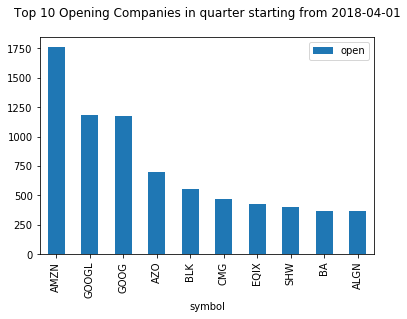

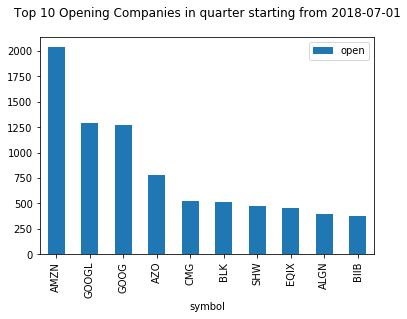

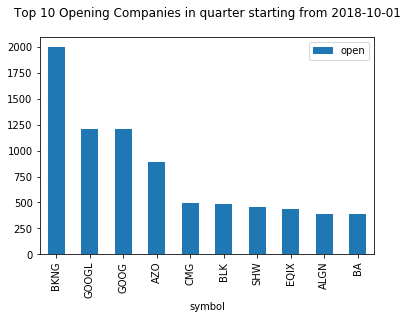

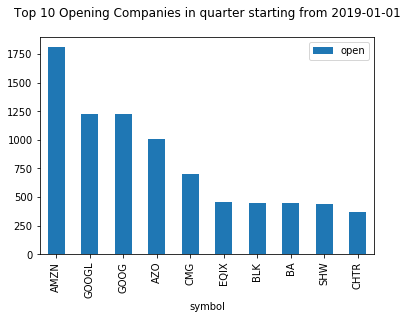

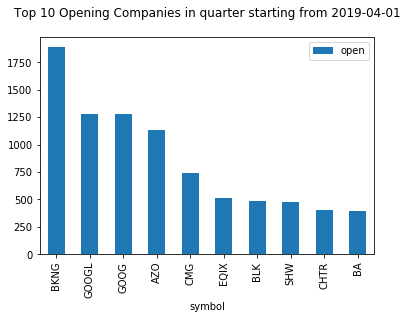

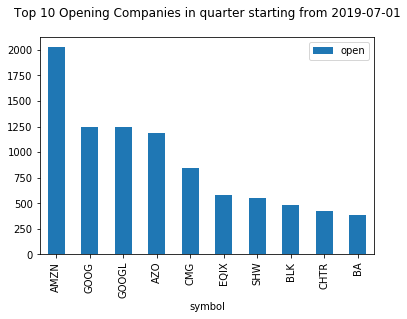

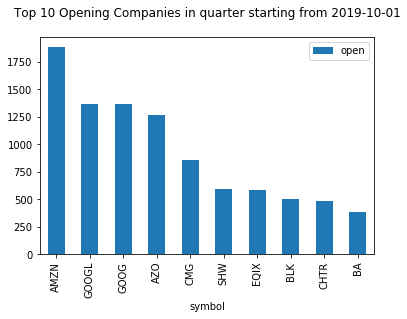

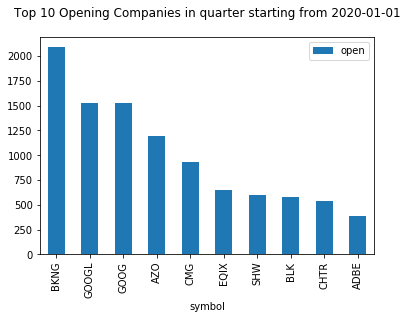

In [6]:
for idx in range(1, len(quarter_list)):
    df_quarter = df[(df["time"] >= quarter_list[idx - 1])  & (df["time"] < quarter_list[idx])]
    df_quarter_open = df_quarter[["symbol", "open"]]
    company_groups = df_quarter_open.groupby("symbol").max().reset_index()
    sorted_company_groups = company_groups.sort_values("open",  ascending=False)
    top_companies = sorted_company_groups[1:11]
    quarter_str = "Top 10 Opening Companies in quarter starting from "+quarter_list[idx - 1]
    top_companies.plot.bar(x="symbol", y="open", rot=90, title=quarter_str)
    figure_name = "Open_Q"+str(idx)
    #print(figure_name)
    plt.savefig(final_directory+"/"+figure_name, bbox_inches="tight")

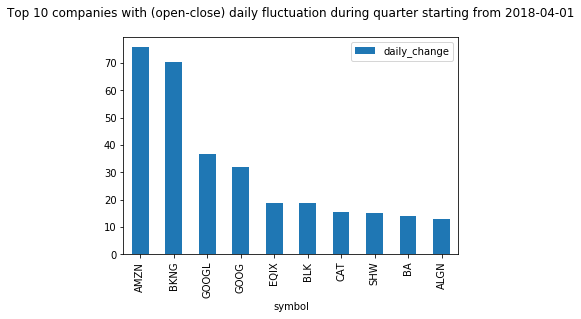

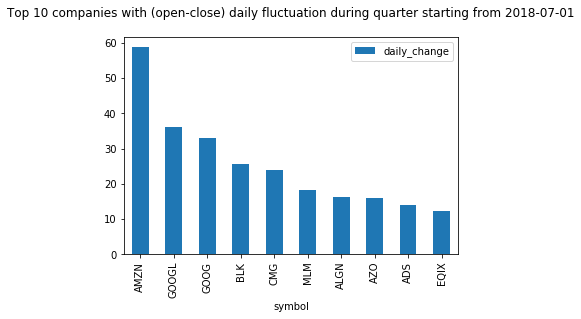

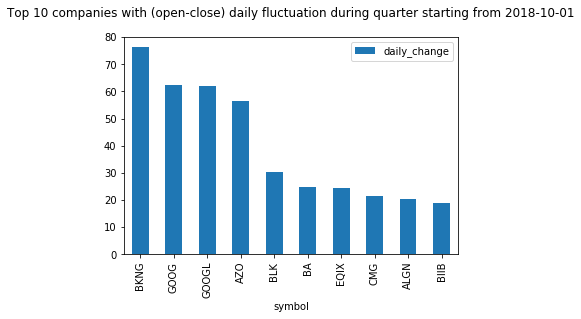

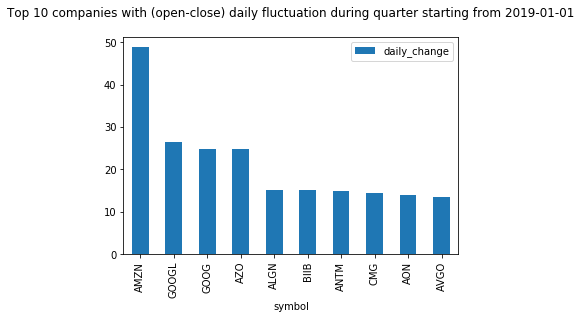

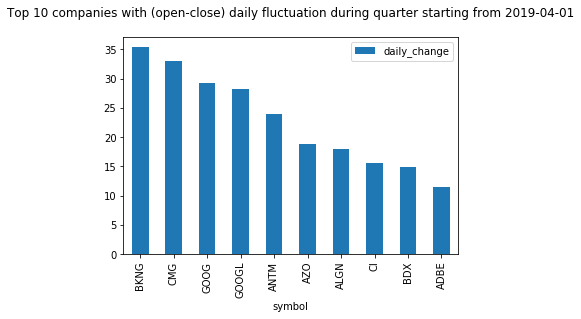

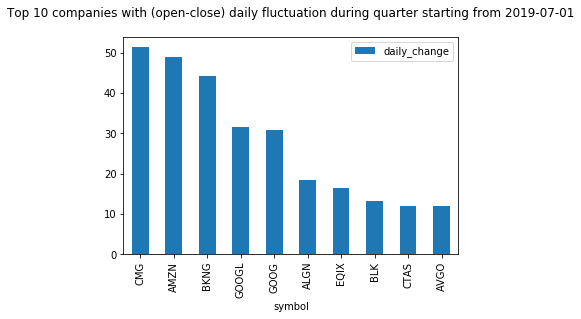

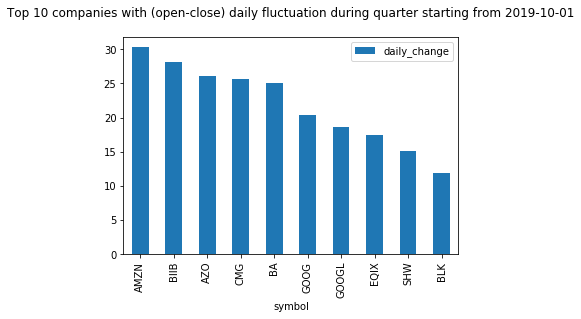

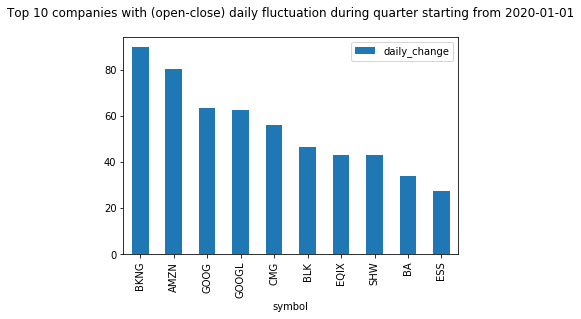

In [7]:
for idx in range(1, len(quarter_list)):
    df_quarter = df[(df["time"] >= quarter_list[idx - 1])  & (df["time"] < quarter_list[idx])]
    df_quarter["daily_change"] = df_quarter["open"] - df_quarter["close"]
    df_quarter_fluctuation = df_quarter[["symbol", "daily_change"]]
    company_groups = df_quarter_fluctuation.groupby("symbol").max().reset_index()
    sorted_company_groups = company_groups.sort_values("daily_change",  ascending=False)
    top_companies = sorted_company_groups[1:11]
    quarter_str = "Top 10 companies with (open-close) daily fluctuation during quarter starting from "+quarter_list[idx - 1]
    top_companies.plot.bar(x="symbol", y="daily_change", rot=90, title=quarter_str)
    figure_name = "daily_fluctuation_Q"+str(idx)
    plt.savefig(final_directory+"/"+figure_name, bbox_inches="tight")

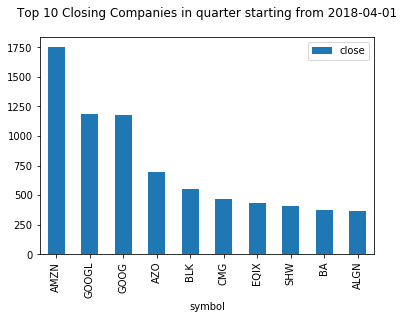

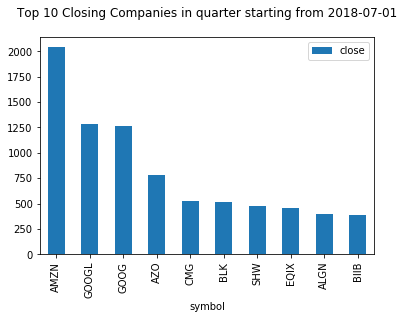

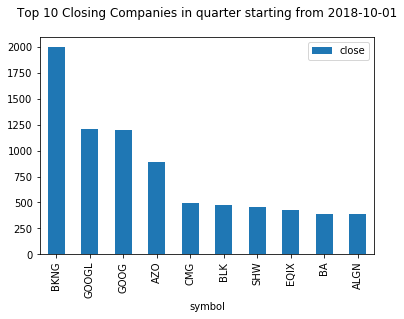

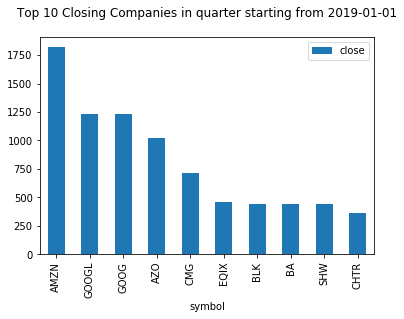

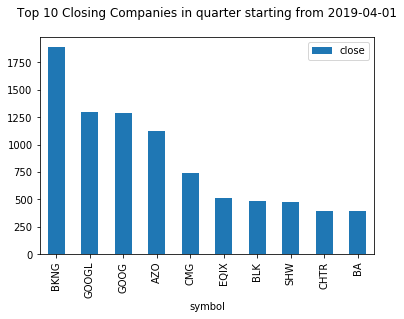

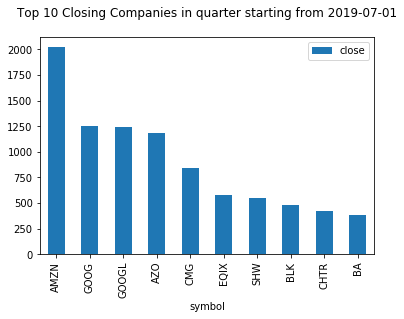

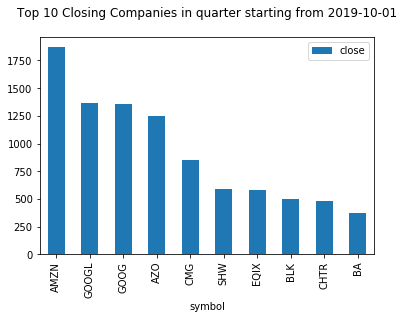

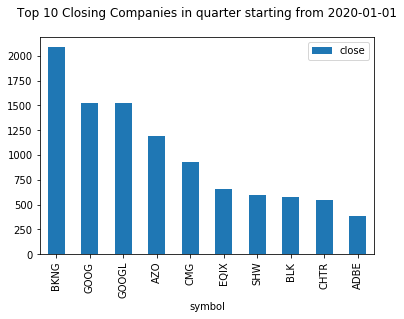

In [8]:
for idx in range(1, len(quarter_list)):
    df_quarter = df[(df["time"] >= quarter_list[idx - 1])  & (df["time"] < quarter_list[idx])]
    df_quarter_close = df_quarter[["symbol", "close"]]
    company_groups = df_quarter_close.groupby("symbol").max().reset_index()
    sorted_company_groups = company_groups.sort_values("close",  ascending=False)
    top_companies = sorted_company_groups[1:11]
    quarter_str = "Top 10 Closing Companies in quarter starting from "+quarter_list[idx - 1]
    top_companies.plot.bar(x="symbol", y="close", rot=90, title=quarter_str)
    figure_name = "close_Q"+str(idx)
    plt.savefig(final_directory+"/"+figure_name, bbox_inches="tight")

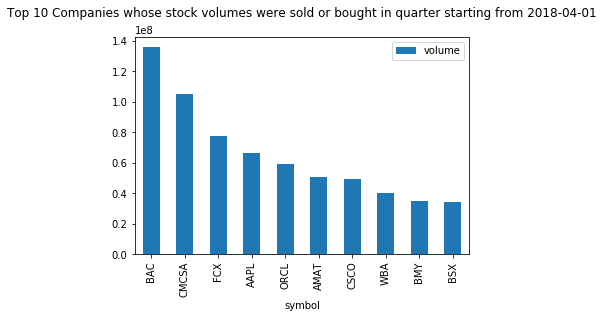

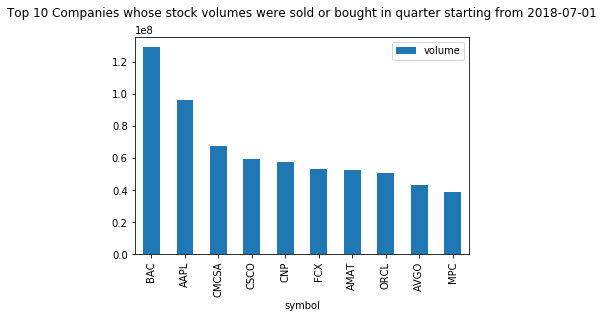

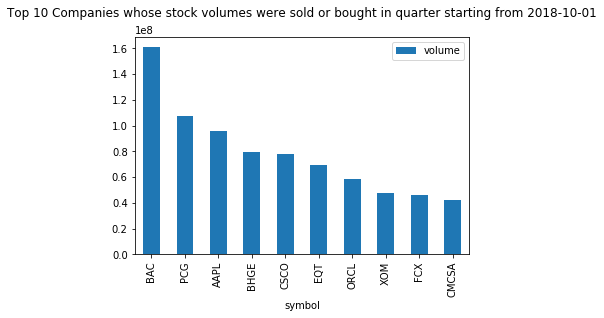

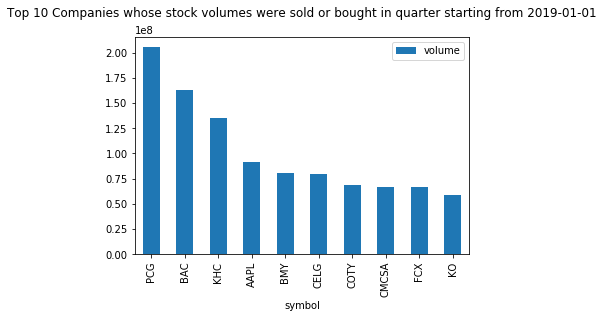

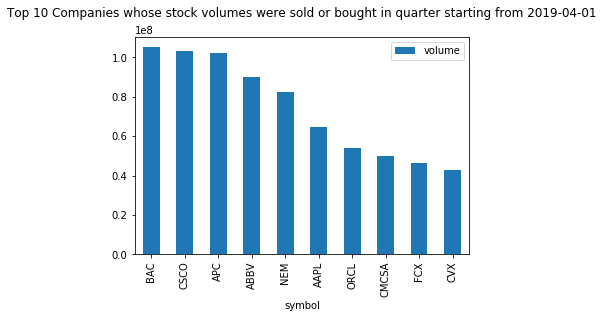

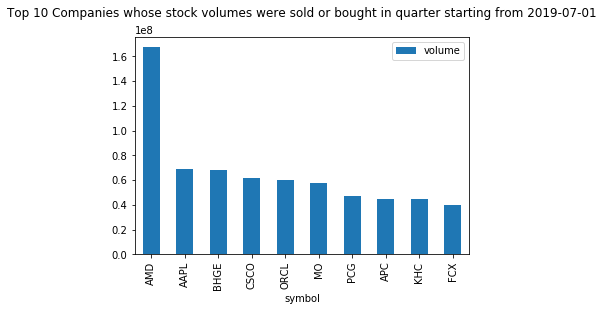

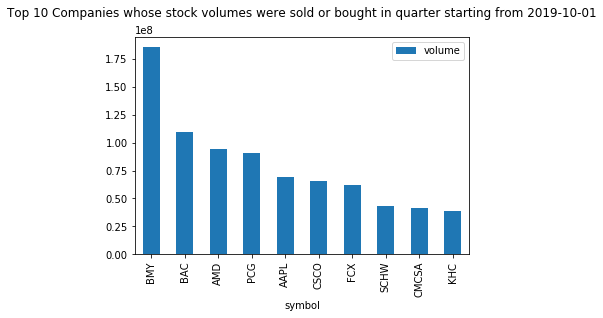

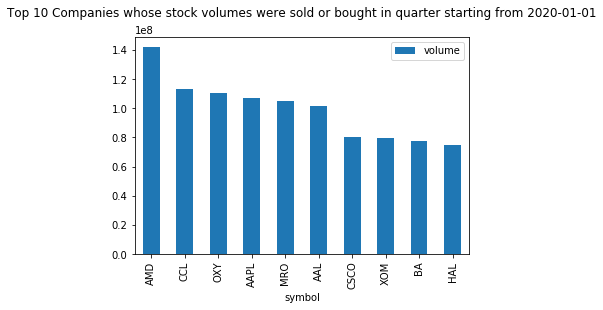

In [9]:
for idx in range(1, len(quarter_list)):
    df_quarter = df[(df["time"] >= quarter_list[idx - 1])  & (df["time"] < quarter_list[idx])]
    df_quarter_volume = df_quarter[["symbol", "volume"]]
    company_groups = df_quarter_volume.groupby("symbol").max().reset_index()
    sorted_company_groups = company_groups.sort_values("volume",  ascending=False)
    top_companies = sorted_company_groups[1:11]
    quarter_str = "Top 10 Companies whose stock volumes were sold or bought in quarter starting from "+quarter_list[idx - 1]
    top_companies.plot.bar(x="symbol", y="volume", rot=90, title=quarter_str)
    figure_name = "volume_Q"+str(idx)
    plt.savefig(final_directory+"/"+figure_name, bbox_inches="tight")

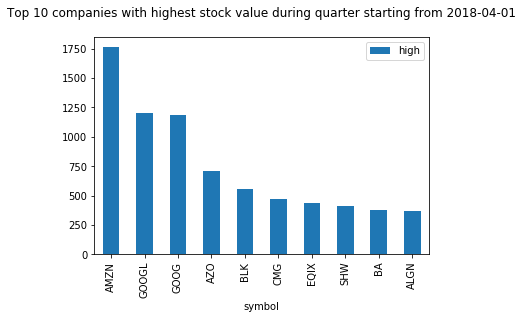

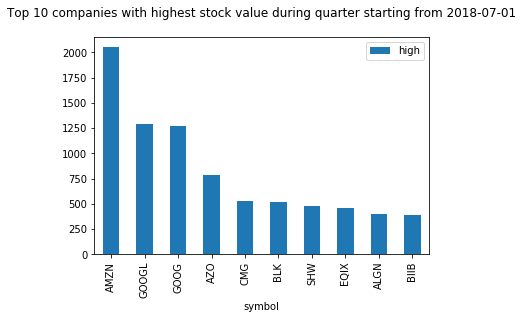

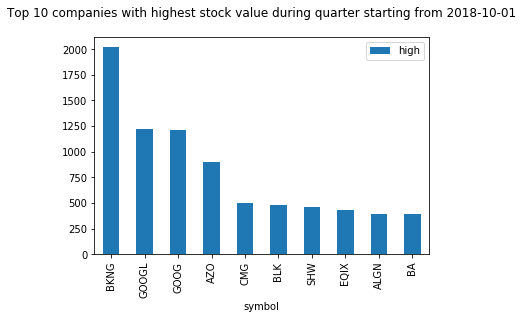

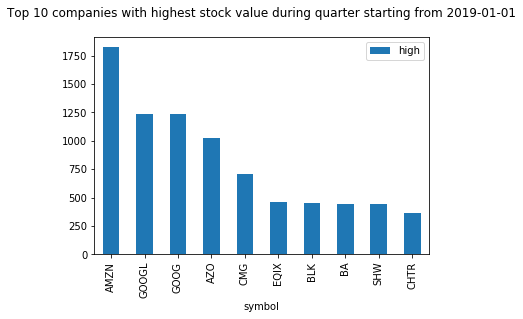

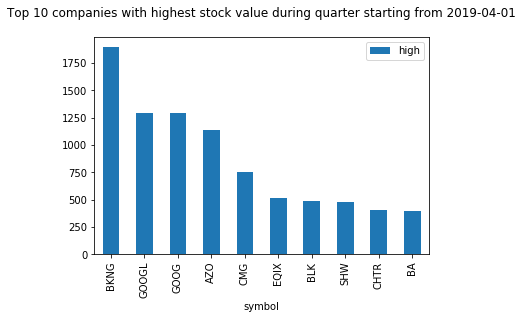

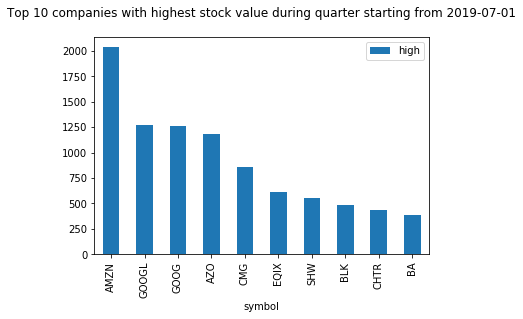

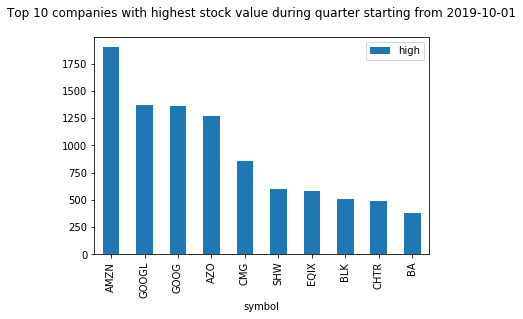

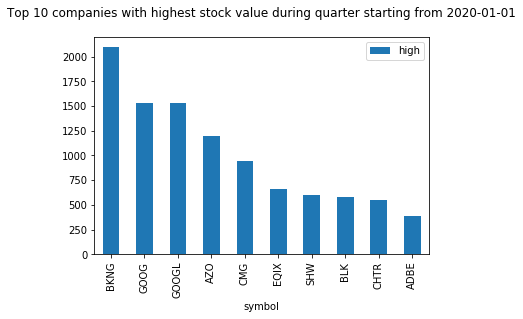

In [10]:
for idx in range(1, len(quarter_list)):
    df_quarter = df[(df["time"] >= quarter_list[idx - 1])  & (df["time"] < quarter_list[idx])]
    df_quarter_high = df_quarter[["symbol", "high"]]
    company_groups = df_quarter_high.groupby("symbol").max().reset_index()
    sorted_company_groups = company_groups.sort_values("high",  ascending=False)
    top_companies = sorted_company_groups[1:11]
    quarter_str = "Top 10 companies with highest stock value during quarter starting from "+quarter_list[idx - 1]
    top_companies.plot.bar(x="symbol", y="high", rot=90, title=quarter_str)
    figure_name = "high_Q"+str(idx)
    plt.savefig(final_directory+"/"+figure_name, bbox_inches="tight")

In [11]:
# eda on the missing values from below we are identifying that the data is missing 
# of some of the companies as we closer to recent date. 
for idx in range(1, len(quarter_list)):
    df_quarter = df[(df["time"] >= quarter_list[idx - 1])  & (df["time"] < quarter_list[idx])]
    df_quarter_open = df_quarter[["symbol", "open"]]
    company_groups = df_quarter_open.groupby("symbol").max().reset_index()
    print("No. of companies data available in the quarter starting {} is {}".format(quarter_list[idx -1], len(company_groups)))

No. of companies data available in the quarter starting 2018-04-01 is 200
No. of companies data available in the quarter starting 2018-07-01 is 200
No. of companies data available in the quarter starting 2018-10-01 is 200
No. of companies data available in the quarter starting 2019-01-01 is 199
No. of companies data available in the quarter starting 2019-04-01 is 199
No. of companies data available in the quarter starting 2019-07-01 is 199
No. of companies data available in the quarter starting 2019-10-01 is 198
No. of companies data available in the quarter starting 2020-01-01 is 196


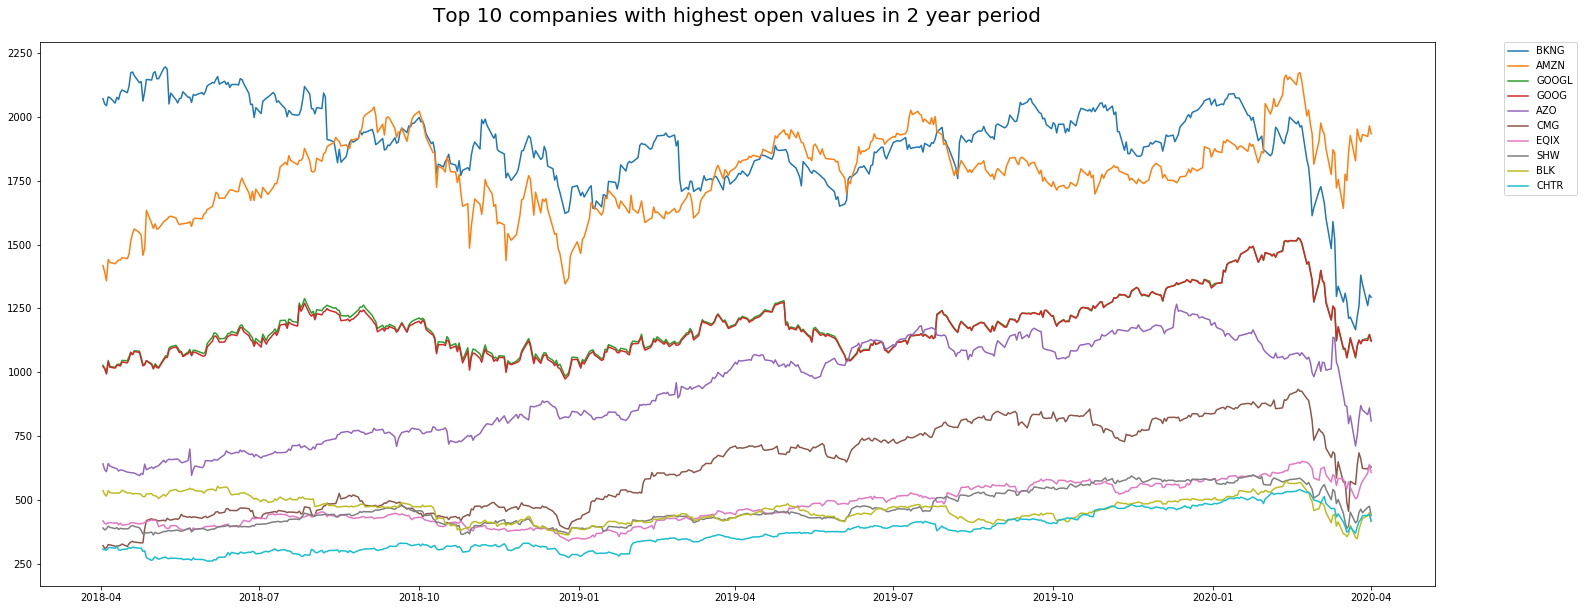

In [12]:
df_open = df.copy()

df_quarter_fluctuation = df_open[["symbol", "open"]]
company_groups = df_quarter_fluctuation.groupby("symbol").max().reset_index()
sorted_company_groups = company_groups.sort_values("open",  ascending=False)
top_10_companies_list = sorted_company_groups["symbol"].head(10).to_list()

plt.figure(figsize=(25, 10))

for u in top_10_companies_list[:10]:
    dates = df_open[(df_open["symbol"] == u)]["time"]
    values = df_open[(df_open["symbol"] == u)]["open"]
    plt.plot(dates.tolist(), values.tolist())

plt.legend(top_10_companies_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Top 10 companies with highest open values in 2 year period", fontsize=20)
quarter_str = "Top 10 companies with highest open values in 2 year period"
plt.savefig(final_directory+"/"+quarter_str, bbox_inches="tight")
plt.show()

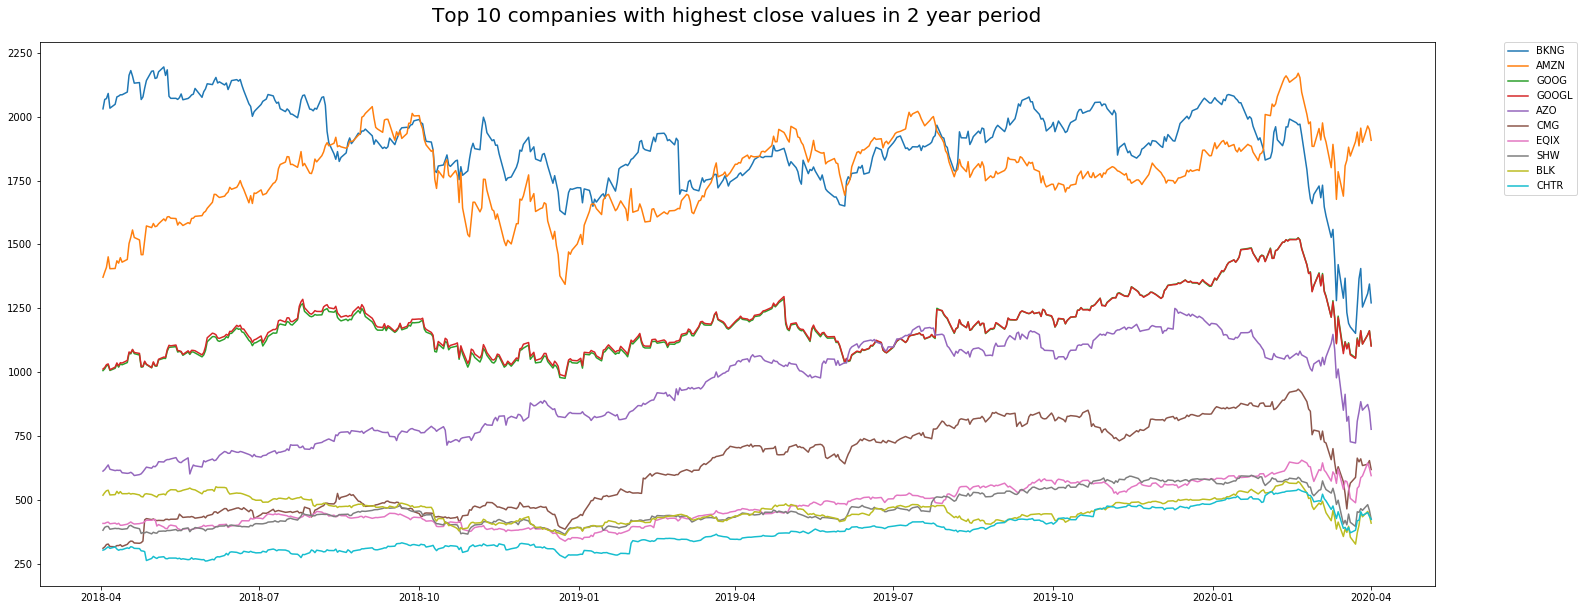

In [13]:
df_close = df.copy()

df_quarter_fluctuation = df_close[["symbol", "close"]]
company_groups = df_quarter_fluctuation.groupby("symbol").max().reset_index()
sorted_company_groups = company_groups.sort_values("close",  ascending=False)
top_10_companies_list = sorted_company_groups["symbol"].head(10).to_list()

plt.figure(figsize=(25, 10))

for u in top_10_companies_list[:10]:
    dates = df_close[(df_close["symbol"] == u)]["time"]
    values = df_close[(df_close["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())


plt.legend(top_10_companies_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Top 10 companies with highest close values in 2 year period", fontsize=20)
quarter_str = "Top 10 companies with highest close values in 2 year period"
plt.savefig(final_directory+"/"+quarter_str, bbox_inches="tight")
plt.show()


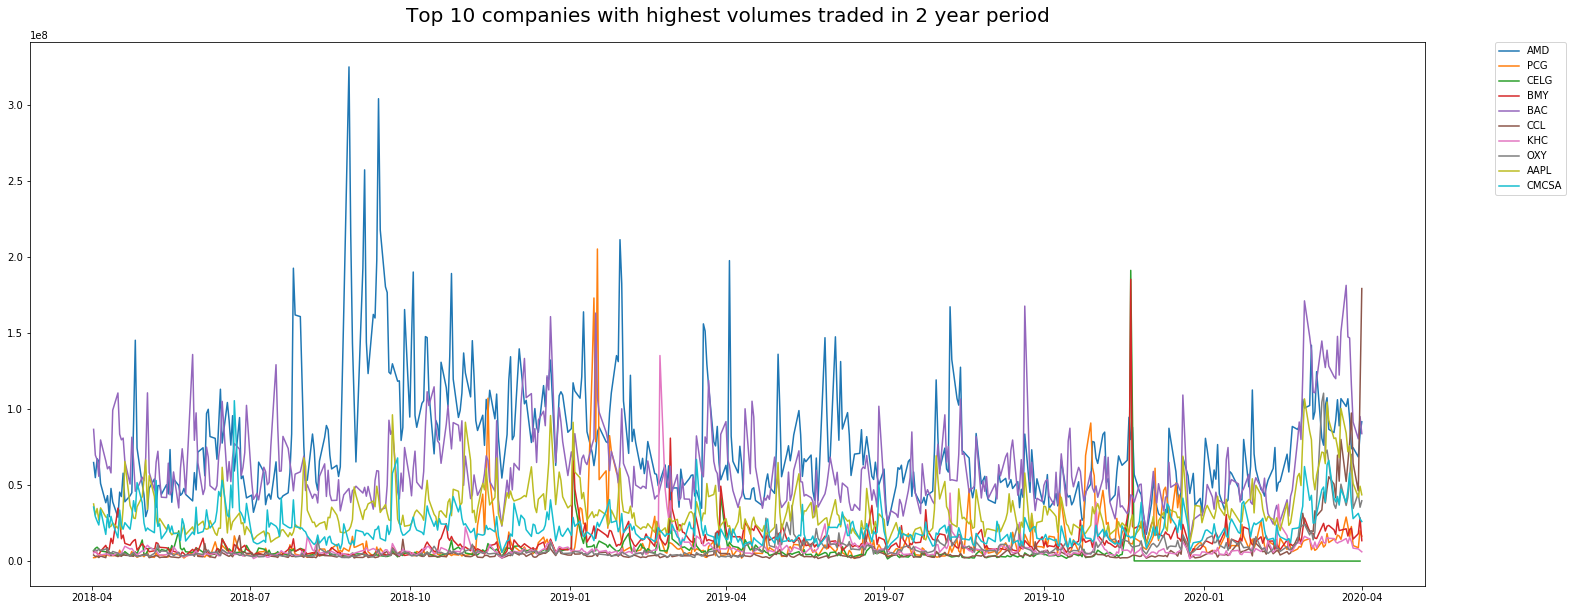

In [14]:
df_vol = df.copy()

df_quarter_fluctuation = df_close[["symbol", "volume"]]
company_groups = df_quarter_fluctuation.groupby("symbol").max().reset_index()
sorted_company_groups = company_groups.sort_values("volume",  ascending=False)
top_10_companies_list = sorted_company_groups["symbol"].head(10).to_list()

plt.figure(figsize=(25, 10))

for u in top_10_companies_list[:10]:
    dates = df_vol[(df_vol["symbol"] == u)]["time"]
    values = df_vol[(df_vol["symbol"] == u)]["volume"]
    plt.plot(dates.tolist(), values.tolist())


plt.legend(top_10_companies_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Top 10 companies with highest volumes traded in 2 year period", fontsize=20)
quarter_str = "Top 10 companies with highest volumes traded in 2 year period"
plt.savefig(final_directory+"/"+quarter_str, bbox_inches="tight")
plt.show()


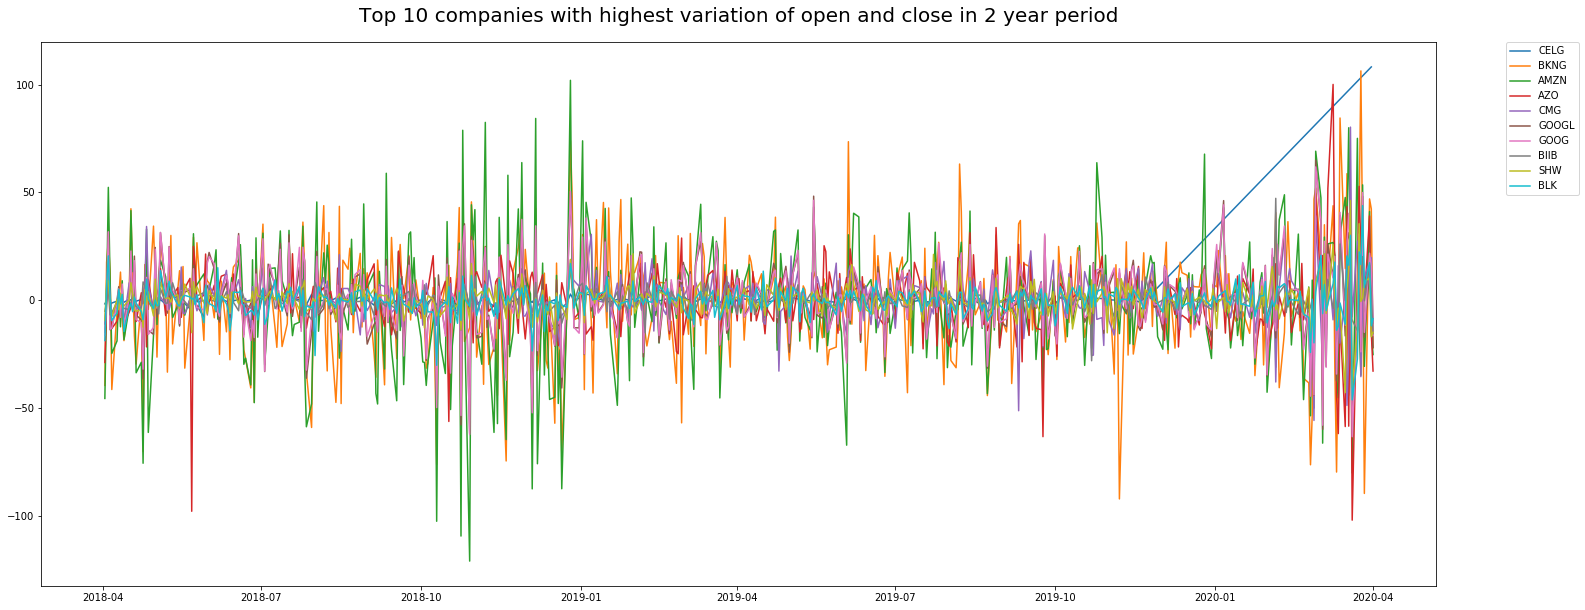

In [15]:
df_flucution = df.copy()

df_flucution["fluctuation"] = df_flucution["close"] - df_flucution["open"]
df_quarter_fluctuation = df_flucution[["symbol", "fluctuation"]]
company_groups = df_quarter_fluctuation.groupby("symbol").max().reset_index()
sorted_company_groups = company_groups.sort_values("fluctuation",  ascending=False)
top_10_companies_list = sorted_company_groups["symbol"].head(10).to_list()

plt.figure(figsize=(25, 10))

for u in top_10_companies_list[:10]:
    dates = df_flucution[(df_flucution["symbol"] == u)]["time"]
    values = df_flucution[(df_flucution["symbol"] == u)]["fluctuation"]
    plt.plot(dates.tolist(), values.tolist())


plt.legend(top_10_companies_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Top 10 companies with highest variation of open and close in 2 year period", fontsize=20)
quarter_str = "Top 10 companies with highest variation of open and close in 2 year period"
plt.savefig(final_directory+"/"+quarter_str, bbox_inches="tight")
plt.show()


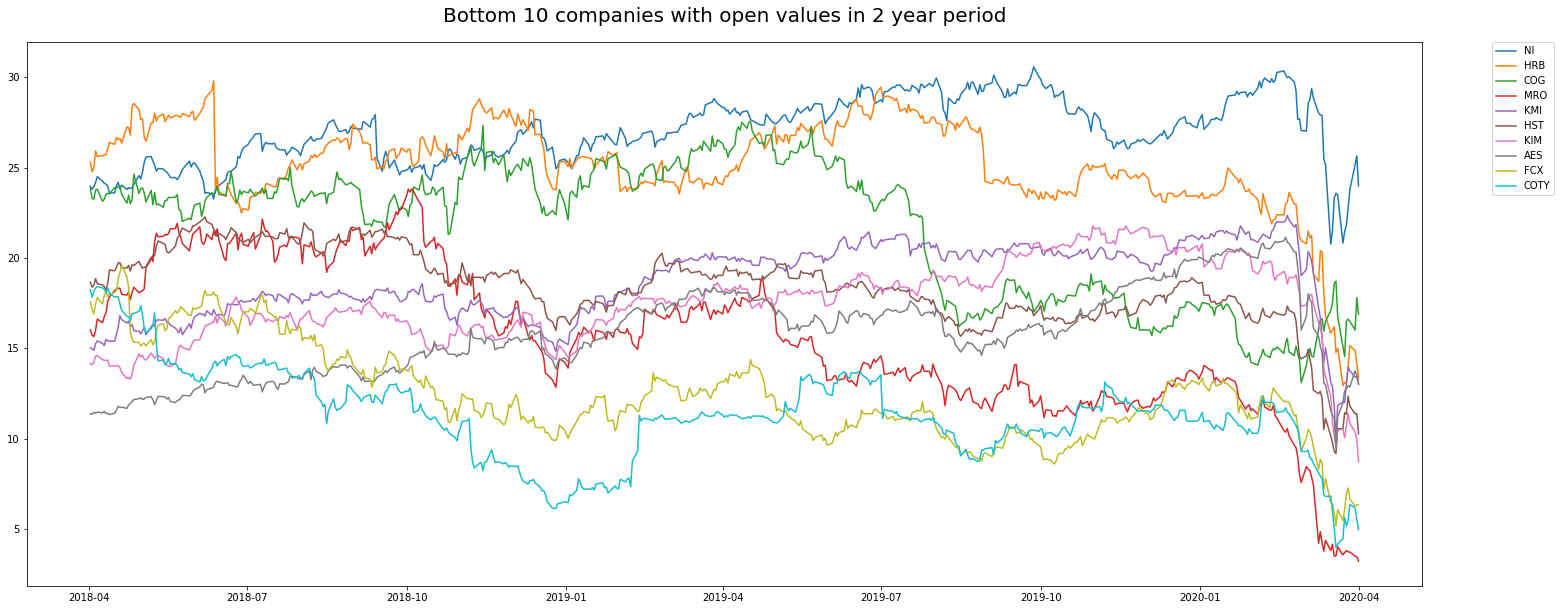

In [16]:
df_open = df.copy()

df_quarter_fluctuation = df_open[["symbol", "open"]]
company_groups = df_quarter_fluctuation.groupby("symbol").max().reset_index()
sorted_company_groups = company_groups.sort_values("open",  ascending=False)
bottom_10_companies_list = sorted_company_groups["symbol"].tail(10).to_list()

plt.figure(figsize=(25, 10))

for u in bottom_10_companies_list[:10]:
    dates = df_open[(df_open["symbol"] == u)]["time"]
    values = df_open[(df_open["symbol"] == u)]["open"]
    plt.plot(dates.tolist(), values.tolist())

plt.legend(bottom_10_companies_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Bottom 10 companies with open values in 2 year period", fontsize=20)
quarter_str = "Bottom 10 companies with open values in 2 year period"
plt.savefig(final_directory+"/"+quarter_str, bbox_inches="tight")
plt.show()

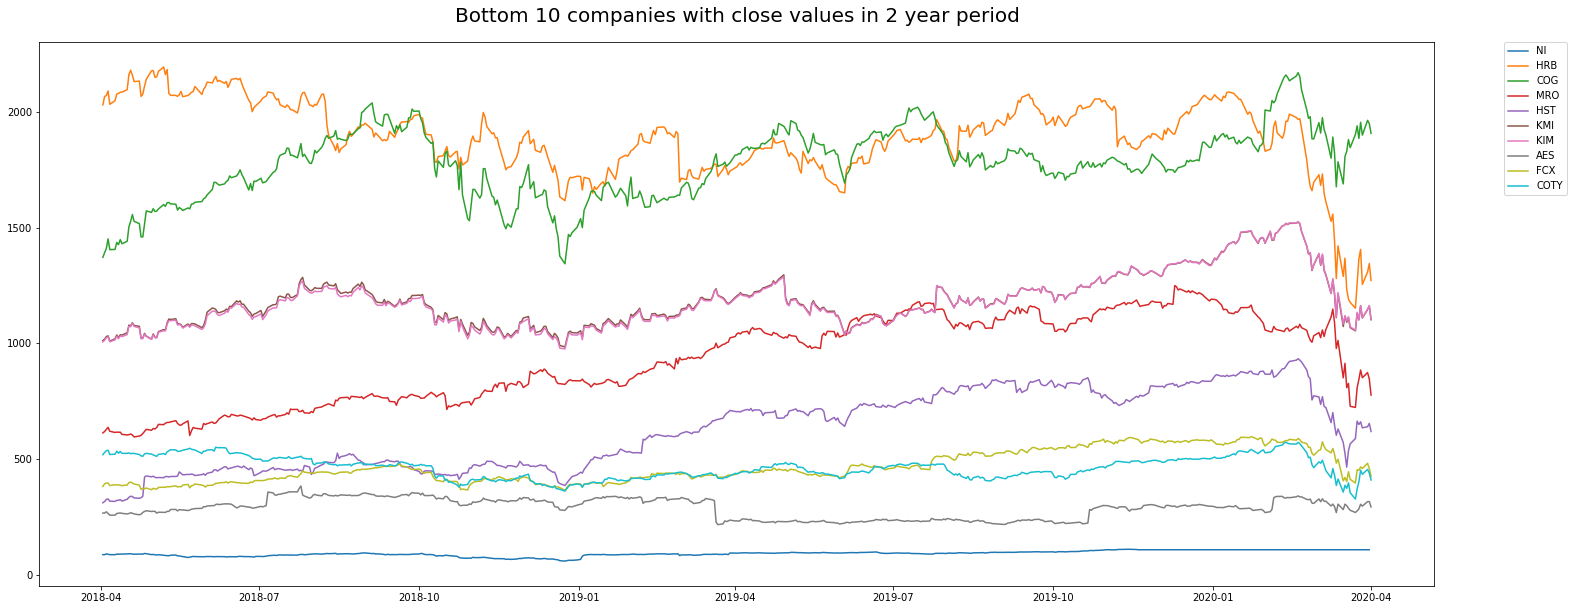

In [17]:
df_close = df.copy()

df_quarter_fluctuation = df_close[["symbol", "close"]]
company_groups = df_quarter_fluctuation.groupby("symbol").max().reset_index()
sorted_company_groups = company_groups.sort_values("close",  ascending=False)
bottom_10_companies_list = sorted_company_groups["symbol"].tail(10).to_list()

plt.figure(figsize=(25, 10))

for u in top_10_companies_list[:10]:
    dates = df_close[(df_close["symbol"] == u)]["time"]
    values = df_close[(df_close["symbol"] == u)]["close"]
    plt.plot(dates.tolist(), values.tolist())


plt.legend(bottom_10_companies_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Bottom 10 companies with close values in 2 year period", fontsize=20)
quarter_str = "Bottom 10 companies with close values in 2 year period"
plt.savefig(final_directory+"/"+quarter_str, bbox_inches="tight")
plt.show()


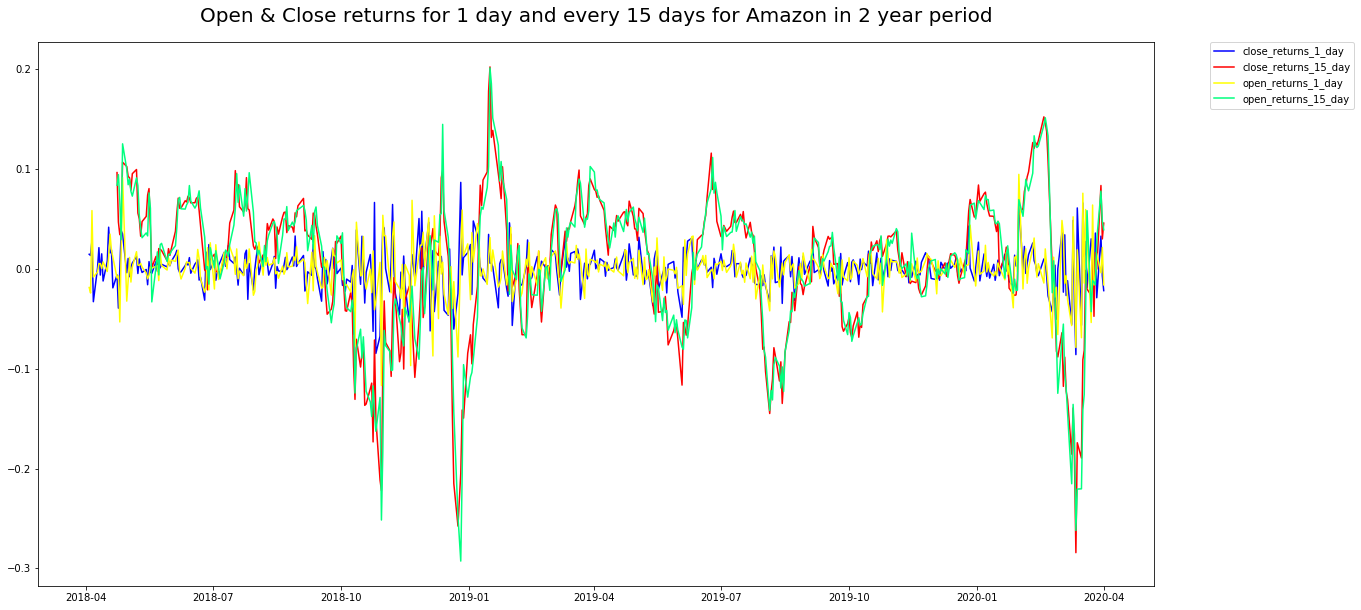

In [18]:
df_returns = df.copy()

#Returns for Amazon for the time interval of 1 day and 10 days for the period of 2 years 
df_ret_comp = df_returns[df_returns["symbol"] == "AMZN"]
df_ret_comp["close_returns_1_day"] = (df_ret_comp["close"] - df_ret_comp["close"].shift(1))/df_ret_comp["close"]
df_ret_comp["close_returns_15_day"] = (df_ret_comp["close"] - df_ret_comp["close"].shift(15))/df_ret_comp["close"]
df_ret_comp["open_returns_1_day"] = (df_ret_comp["open"] - df_ret_comp["open"].shift(1))/df_ret_comp["open"]
df_ret_comp["open_returns_15_day"] = (df_ret_comp["open"] - df_ret_comp["open"].shift(15))/df_ret_comp["open"]
dates = df_ret_comp["time"]
close_returns_1_day = df_ret_comp["close_returns_1_day"]
close_returns_15_day = df_ret_comp["close_returns_15_day"]
open_returns_1_day = df_ret_comp["open_returns_1_day"]
open_returns_15_day = df_ret_comp["open_returns_15_day"]
plt.figure(figsize=(20, 10))
plt.plot(dates.tolist(), close_returns_1_day.tolist(), color="blue")
plt.plot(dates.tolist(), close_returns_15_day.tolist(), color="red")
plt.plot(dates.tolist(), open_returns_1_day.tolist(), color="yellow")
plt.plot(dates.tolist(), open_returns_15_day.tolist(), color="springgreen")
plt.legend(["close_returns_1_day", "close_returns_15_day", "open_returns_1_day", "open_returns_15_day"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Open & Close returns for 1 day and every 15 days for Amazon in 2 year period", fontsize=20)
quarter_str = "Open & Close returns for 1 day and every 15 days for Amazon in 2 year period"
plt.savefig(final_directory+"/"+quarter_str, bbox_inches="tight")
plt.show()


In [19]:
from __future__ import division

df_interest = df.copy()

df_interest["change"] = df_interest["close"] - df_interest["open"]

# Get each symbols standard deviation in time
ss = df_interest.groupby(by=["symbol"])["change"].std()

# Count each symbol groups positive day change in time
## NOTE: it is a proportion to account for some days not appearing for some symbols in time
pcs = df_interest.groupby(by='symbol').apply(lambda grp: grp[grp['change'] > 0]['change'].count() / grp['change'].size)

avgv = df_interest.groupby(by=['symbol'])['volume'].mean()/10000000

newdf = pd.concat([ss, pcs, avgv], axis=1).reset_index()
newdf.columns = ['symbol', 'std', 'prop_pos_day_change', "avg_volume"]
newdf.head()

symbol       std  prop_pos_day_change  avg_volume
0      A  0.988038             0.538614    0.237857
1    AAL  0.792164             0.459406    0.997534
2    AAP  2.586126             0.477228    0.111578
3   AAPL  3.200648             0.546535    3.253040
4   ABBV  1.291973             0.499010    0.808286

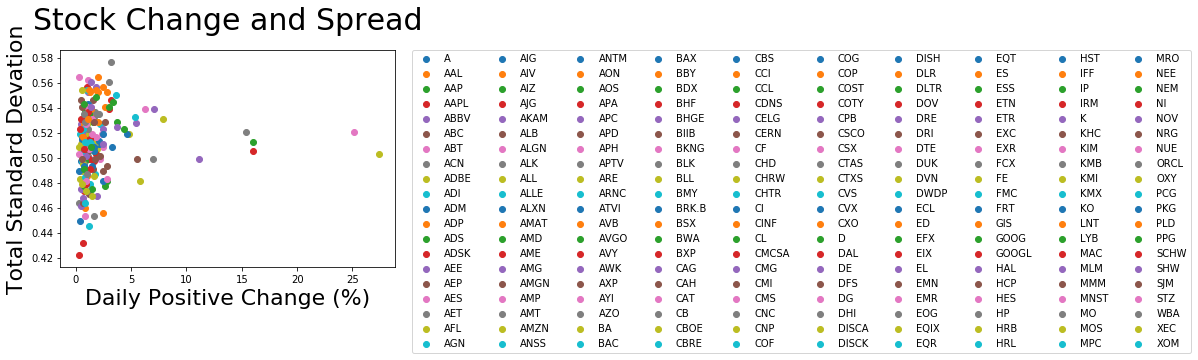

<Figure size 1440x7200 with 0 Axes>

In [20]:
for i in newdf['symbol'].tolist():
    x = newdf[newdf['symbol'] == i]['std']
    y = newdf[newdf['symbol'] == i]['prop_pos_day_change']
    plt.scatter(x,y)
plt.legend(newdf['symbol'].tolist(),
           bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.,
           ncol=10)


plt.title(r'Stock Change and Spread', fontsize=30)
plt.xlabel('Daily Positive Change (%)', fontsize=22)
plt.ylabel('Total Standard Devation', fontsize=22)
plt.figure(figsize=(20,100))
quarter_str = "Stock Change and Spread"
plt.savefig(final_directory+"/"+quarter_str, bbox_inches="tight")
plt.show()

In [21]:
import seaborn as sns

#represent the fluction of the top 10 companies over the perios
def build_density_facetwrap(somedf, colName, valName, wrapAmount, yourTitle):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(somedf,col=colName, hue=colName, col_wrap=wrapAmount, palette=pal)
    # Draw the densities in a few steps
    g.map(sns.kdeplot, valName, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, valName, clip_on=False, color="w", lw=0.5, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .4, label, fontweight="bold", color=color, 
                ha="left", va="center", transform=ax.transAxes)
        plt.xlabel('Change ($/day)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

    g.map(label, "fluctuation")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=0)

    # Remove axes details that don't play will with overlap
    g.set_titles("")
    g.fig.suptitle(yourTitle, fontsize=32)
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    g.fig.subplots_adjust(top=.8)
    g.add_legend()
    g.savefig(final_directory+"/"+"Top 10 closers change", bbox_inches="tight")

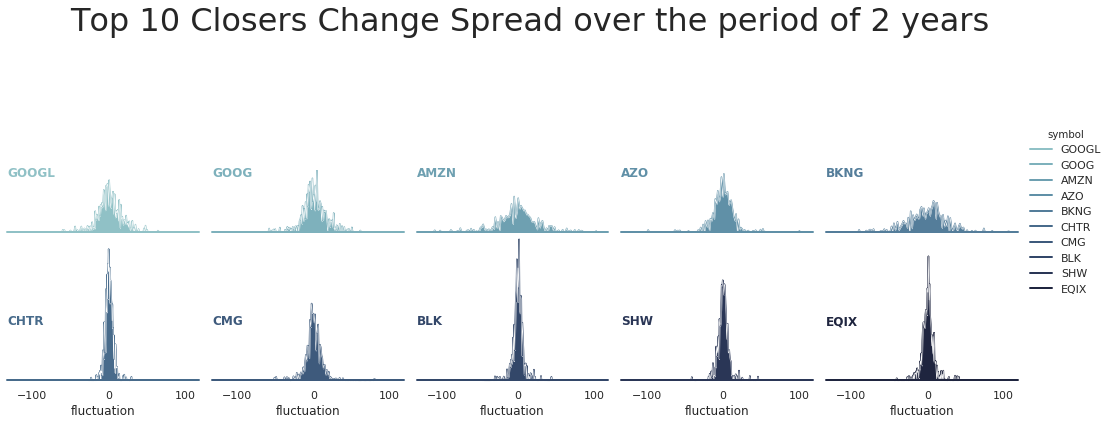

In [22]:
df_flucution = df.copy()

df_flucution["fluctuation"] = df_flucution["close"] - df_flucution["open"]
symbols = df_flucution["symbol"].unique().tolist()

maxPerSymbol={}
for u in symbols:
    values = df_flucution[(df_flucution["symbol"] == u)]["close"].tolist()
    maxPerSymbol[u] = max(values)

top10Closers = list(dict(sorted(maxPerSymbol.items(), 
                   key=lambda v:v[1], #sort by key -> v[0] | sort by value->v[1]
                   reverse=True)[:10]).keys())

top_10_mask = [i in top10Closers for i in df_flucution["symbol"].tolist()]
df_masked2 = df_flucution[top_10_mask]
df_masked2.head()

build_density_facetwrap(df_masked2,
                       "symbol",
                        "fluctuation",
                        5,
                        "Top 10 Closers Change Spread over the period of 2 years"
                       )